In [2]:
import re
string = "#2a$#b%c%561#"
s2 = re.sub('\W','',string)
s2 = re.sub('[a-z]','',s2)
s2 = re.sub('[0-9]','#',s2)

print(s2)


####


In [8]:
S1 = "the first column F will contain only 5 unique values"
S2 = "the second column S will contain only 3 unique values"

s1=S1.split()
s2=S2.split()
print(len([i for i in s2 if i in s1]))
print(([i for i in s1 if i not in s2]))
print(([i for i in s2 if i not in s1]))

7
['first', 'F', '5']
['second', 'S', '3']


In [9]:
import pandas as pd
import numpy as np
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills'], 'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2], 'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

data=pd.DataFrame.from_dict(data)
data.index=labels
print(data)


        birds  age  visits priority
a      Cranes  3.5       2      yes
b      Cranes  4.0       4      yes
c     plovers  1.5       3       no
d  spoonbills  NaN       4      yes
e  spoonbills  6.0       3       no
f      Cranes  3.0       4       no
g     plovers  5.5       2       no
h      Cranes  NaN       2      yes
i  spoonbills  8.0       3       no
j  spoonbills  4.0       2       no


In [10]:
print(data['birds'].describe())

count         10
unique         3
top       Cranes
freq           4
Name: birds, dtype: object


In [11]:
print(data[['birds', 'age']]) 

        birds  age
a      Cranes  3.5
b      Cranes  4.0
c     plovers  1.5
d  spoonbills  NaN
e  spoonbills  6.0
f      Cranes  3.0
g     plovers  5.5
h      Cranes  NaN
i  spoonbills  8.0
j  spoonbills  4.0


In [12]:
#Questions related to data1.csv

In [13]:
data1 = pd.read_csv("data1.csv")

In [14]:
#number of features
print(data1.shape)
# number of data-points(i have confusion regarding this data-points)
print(data1.count(axis=0))
print(data1.count(axis=1))


(306, 4)
age       306
year      306
nodes     306
status    306
dtype: int64
0      4
1      4
2      4
3      4
4      4
5      4
6      4
7      4
8      4
9      4
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     4
20     4
21     4
22     4
23     4
24     4
25     4
26     4
27     4
28     4
29     4
      ..
276    4
277    4
278    4
279    4
280    4
281    4
282    4
283    4
284    4
285    4
286    4
287    4
288    4
289    4
290    4
291    4
292    4
293    4
294    4
295    4
296    4
297    4
298    4
299    4
300    4
301    4
302    4
303    4
304    4
305    4
Length: 306, dtype: int64


In [15]:
for col in data1.columns:
    print(col)

age
year
nodes
status


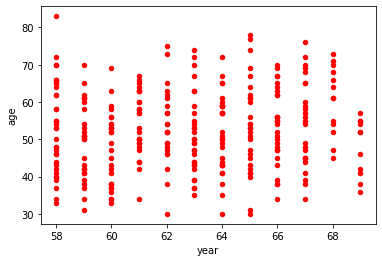

In [16]:

import matplotlib.pyplot as plt
data1.plot(kind='scatter',x='year',y='age',color='red')
plt.show()

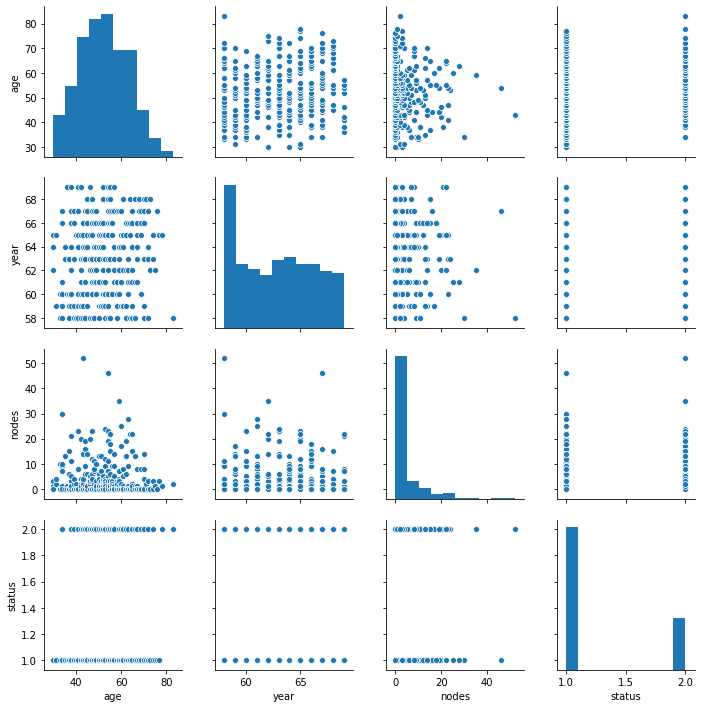

In [17]:

import seaborn as sns
sns.pairplot(data1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=3, units=6)`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6)`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 153 samples, validate on 76 samples
Epoch 1/100
153/153 [==============================] - 4s 24ms/step - loss: 0.5964 - acc: 0.5817 - val_loss: 0.5646 - val_acc: 0.5921
Epoch 2/100
153/153 [==============================] - 0s 1ms/step - loss: 0.5441 - acc: 0.7190 - val_loss: 0.5125 - val_acc: 0.6711
Epoch 3/100
153/153 [==============================] - 0s 422us/step - loss: 0.4964 - acc: 0.7582 - val_loss: 0.4643 - val_acc: 0.7237
Epoch 4/100
153/153 [==============================] - 0s 992us/step - loss: 0.4540 - acc: 0.7582 - val_loss: 0.4182 - val_acc: 0.7237
Epoch 5/100
153/153 [==============================] - 0s 899us/step - loss: 0.4102 - acc: 0.7582 - val_loss: 0.3726 - val_acc: 0.7237
Epoch 6/100
153/153 [==============================] - 0s 447us/step - loss: 0.3672 - acc: 0.7582 - val_loss: 0.3260 - val_acc: 0.7237
Epoch 7/100
153/153 [==============================] - 0s 458us/step - loss: 0.3239 - acc: 0.7582 - val_loss: 0.2801 - val_acc: 0.7237
Epoch 8/100
1

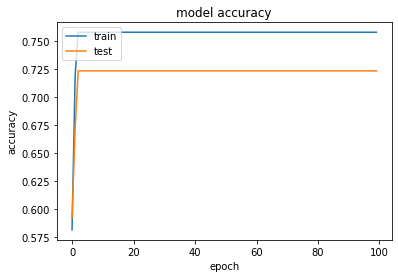

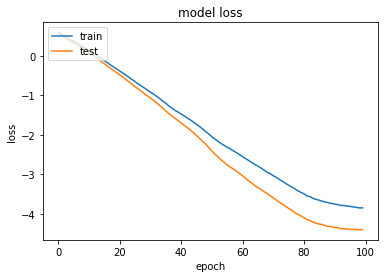

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

data=pd.read_csv('data1.csv')

x=data.iloc[:,0:3]
y=data.iloc[:,-1]

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=20)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(output_dim = 6, activation='relu',input_dim = 3))
classifier.add(Dense(output_dim = 6,activation='relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

print(score)

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

0.8099163306707984


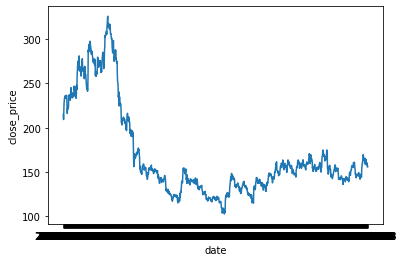

In [19]:
#Linear regression model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

use_cols=['Date','Close']
data2=pd.read_csv("timeseriesdata.csv",usecols=use_cols)

data2['date']= pd.to_datetime(data2.Date)

data2['Year']=data2.date.dt.year
data2['Month']=data2.date.dt.month
data2['Day']=data2.date.dt.day

data=data2.drop(['Date', 'date'], axis = 1) 

x=data.iloc[:,1:4]
y=data.iloc[:,0:1]

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=.25,random_state=20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
scaler.fit(y_train)
y_train= scaler.transform(y_train)
scaler.fit(y_test)
y_test = scaler.transform(y_test)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)



from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

#plot
plt.ylabel('close_price')
plt.xlabel('date')
plt.plot(data2['Date'],data2['Close'])






Epoch 1/100
1090/1090 [==============================] - 12s 11ms/step - loss: 0.0245
Epoch 2/100
1090/1090 [==============================] - 6s 6ms/step - loss: 0.0042
Epoch 3/100
1090/1090 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 4/100
1090/1090 [==============================] - 7s 6ms/step - loss: 0.0042A: 1s - l
Epoch 5/100
1090/1090 [==============================] - 7s 6ms/step - loss: 0.0036
Epoch 6/100
1090/1090 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 7/100
1090/1090 [==============================] - 6s 6ms/step - loss: 0.0034
Epoch 8/100
1090/1090 [==============================] - 6s 6ms/step - loss: 0.0038
Epoch 9/100
1090/1090 [==============================] - 6s 6ms/step - loss: 0.0032
Epoch 10/100
1090/1090 [==============================] - 6s 6ms/step - loss: 0.0028
Epoch 11/100
1090/1090 [==============================] - 6s 6ms/step - loss: 0.0029
Epoch 12/100
1090/1090 [==============================] - 6s 6m

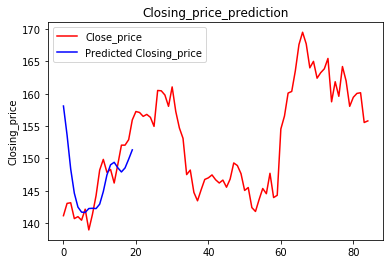

In [20]:
#LSTM Model(Q-12 part 2)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train = pd.read_csv('timeseriesdata.csv')
training_set = dataset_train.iloc[:, 5:6].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1150):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#creating model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

#Testing data(here i made one excel file and copy the last few data from timeseriesdata.csv file for testing purpose)
dataset_test = pd.read_excel('test_data.xlsx')
real_closing_price = dataset_test.iloc[:, 5:6].values
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_closing_price, color = 'red', label = 'Close_price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Closing_price')
plt.title('Closing_price_prediction')

plt.ylabel('Closing_price')
plt.legend()
plt.show()

